# Worksheet 23

Name: Jacob Stein
UID: U33341709

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

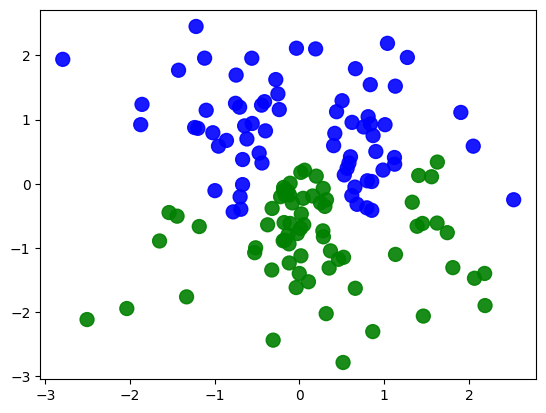

3602/3602 [==============================] - 1s 215us/step


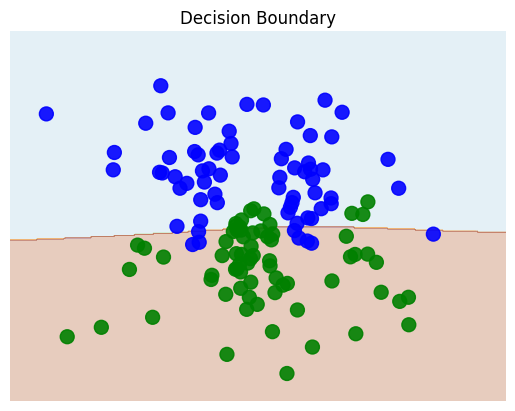

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200, verbose=0)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

Made the following changes to improve performance:
- Increased number of neurons per layer and added another layer
- Added L2 regularization
- Added adaptive learning rate optimizer (Adam)
- Significantly increased number of training epochs

3602/3602 [==============================] - 1s 262us/step


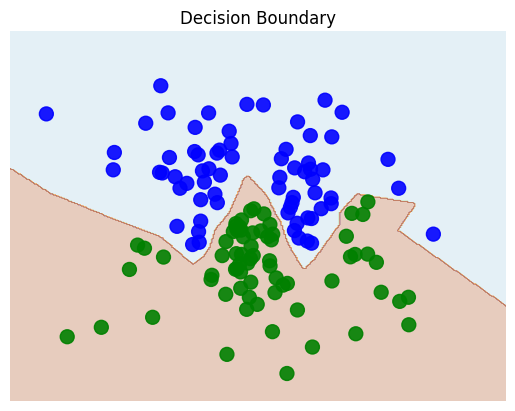

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = keras.models.Sequential([
    layers.Dense(10, input_dim=2, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dense(10, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy")

history = model.fit(X, Y, batch_size=32, epochs=2500, verbose=0) 

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

1347/1347 [==============================] - 0s 230us/step


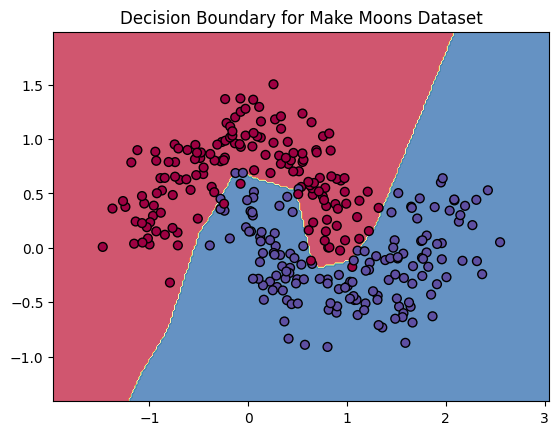

In [15]:
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=300, noise=0.20, random_state=42)

model = keras.models.Sequential([
    layers.Dense(10, input_dim=2, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dense(10, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy")

model.fit(X, Y, batch_size=32, epochs=3000, verbose=0)

h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
ax.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("Decision Boundary for Make Moons Dataset")
plt.show()